## We will replicate the machine learning research paper

**Name:** 《An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale》

**Website:** [https://arxiv.org/abs/2010.11929](https://arxiv.org/abs/2010.11929)

#### 0.Getting setup

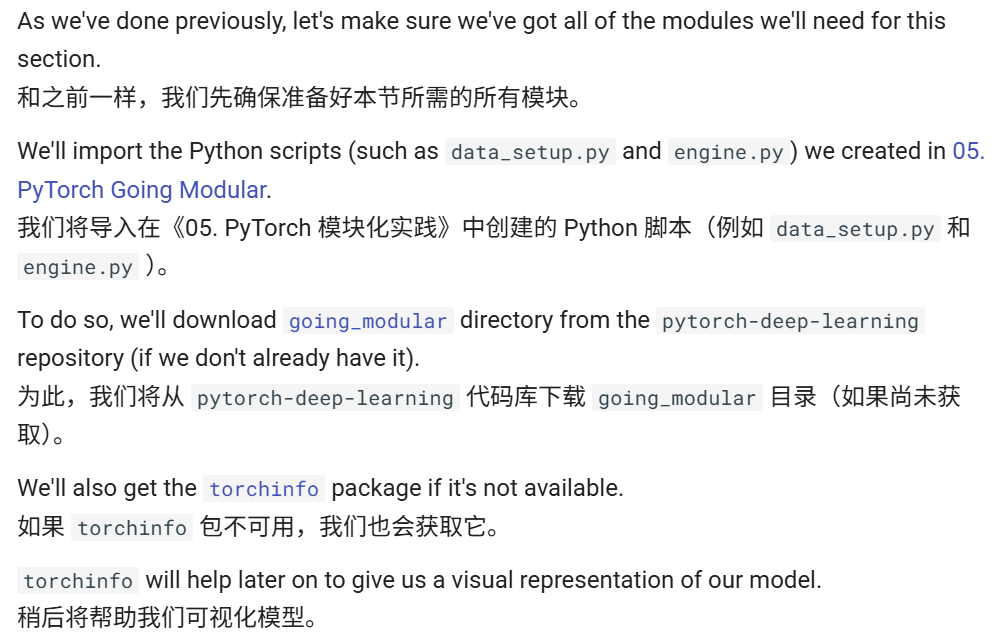

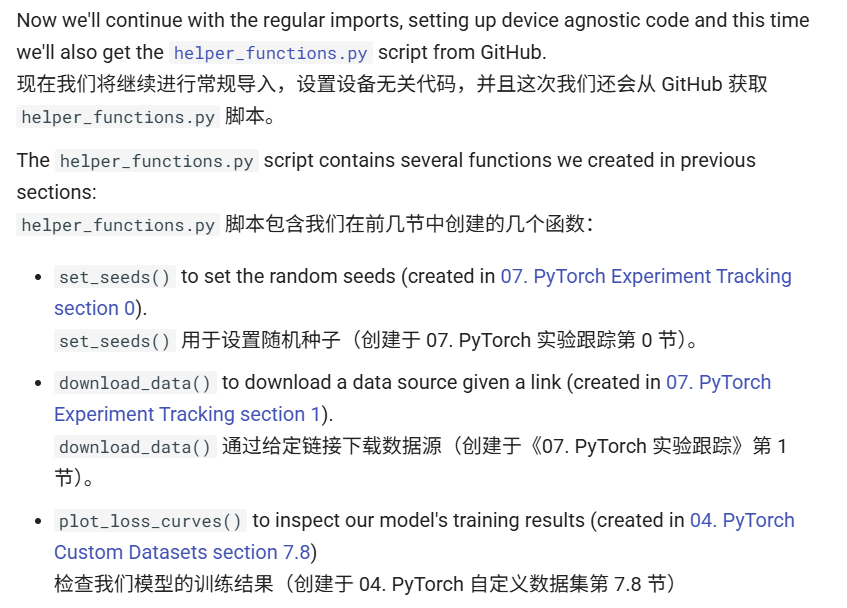

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### 1. Get Data



In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(
    source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
    destination="pizza_steak_sushi"
)
image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [5]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

#### 2. Create Datasets and DataLoaders

Turn `data` into `DataLoader`'s

Paper Data Information:
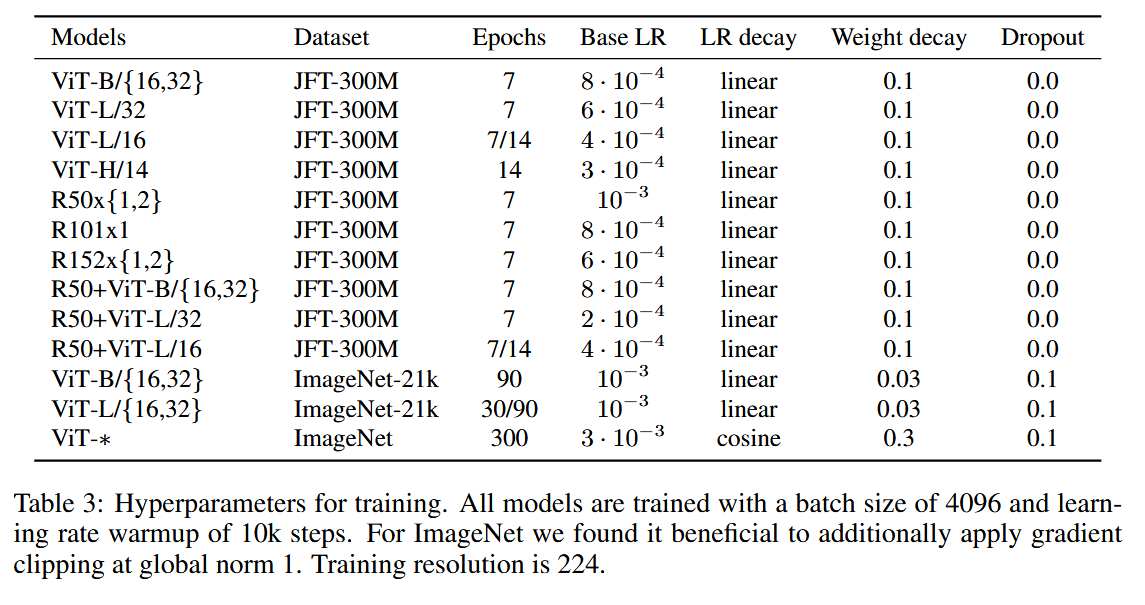

##### 2.1 Prepare transforms for images

In [7]:
# Create image size (from Table 3 in the Vit paper)
IMG_SIZE = 224

# Create transform pipline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


##### 2.2 Turn images into `DataLoader`'s

Create DataLoader

In [8]:
# Set the batch size
BATCH_SIZE = 64

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # Use manually created transforms
    batch_size=BATCH_SIZE
)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f5de1d5f2d0>,
 ['pizza', 'steak', 'sushi'])

Let's visualize a single image

In [9]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

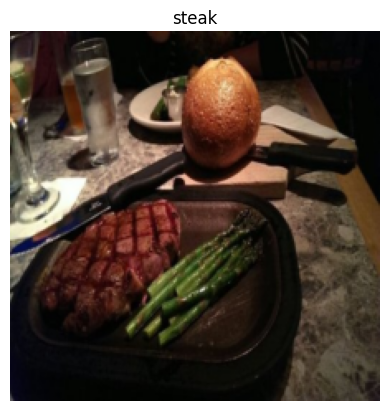

In [10]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

#### 3. Replicating the ViT paperL an overview

**Model Inputs:** images of pizza, steak and sushi

**Model outputs:** predicted labels of pizza, steak and sushi

##### 3.1 Inputs and outputs, layers and blocks

The architectures:

- **Layers** - takes an input, performs a function on it, returns an output
- **Block** - a collection of layers, takes an input, performs a series of functions on it, returns an output.
- **Architecture (or model)** - a collection of blocks, takes an input, performs a series of functions on it, returns an output

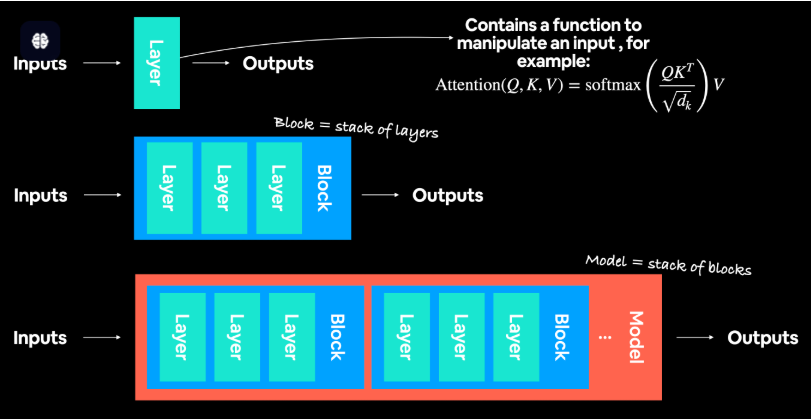

##### 3.2 Getting specific: What's ViT made of?

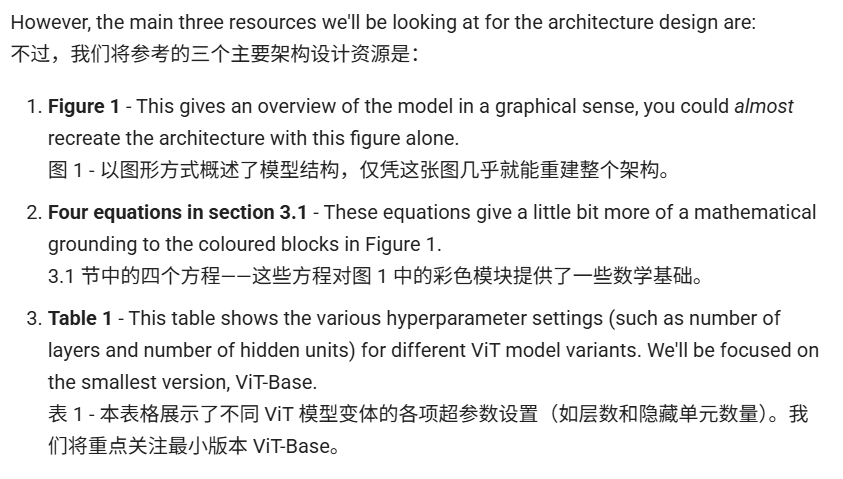

###### 3.2.1 Exploring Figure 1

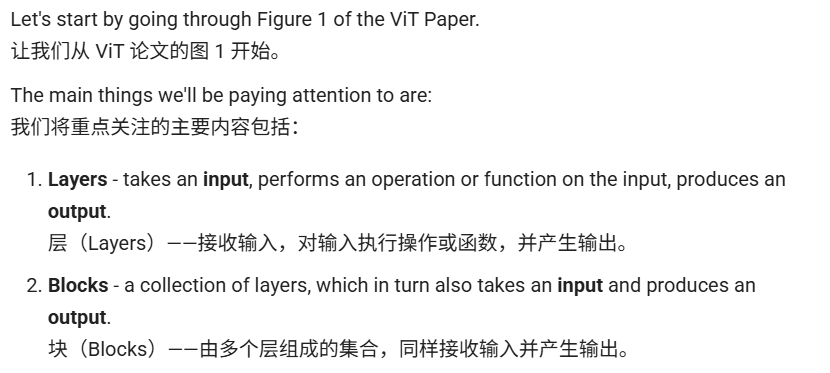

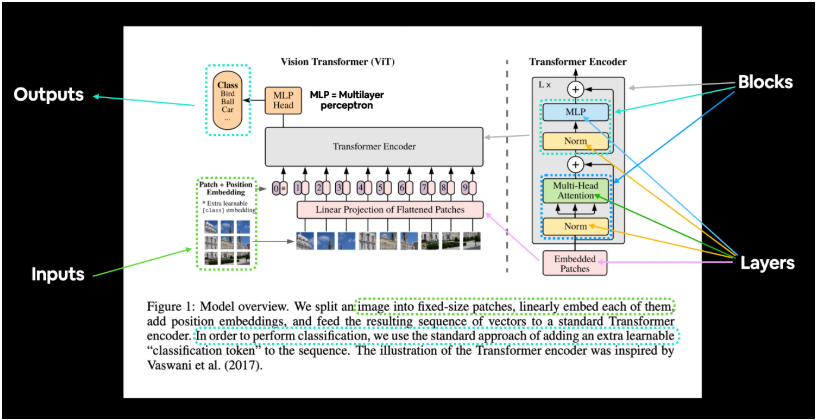

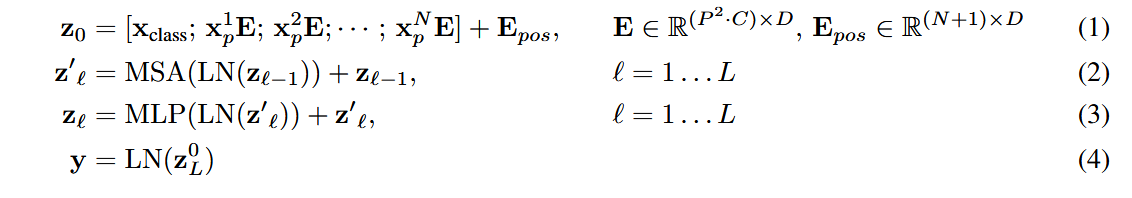

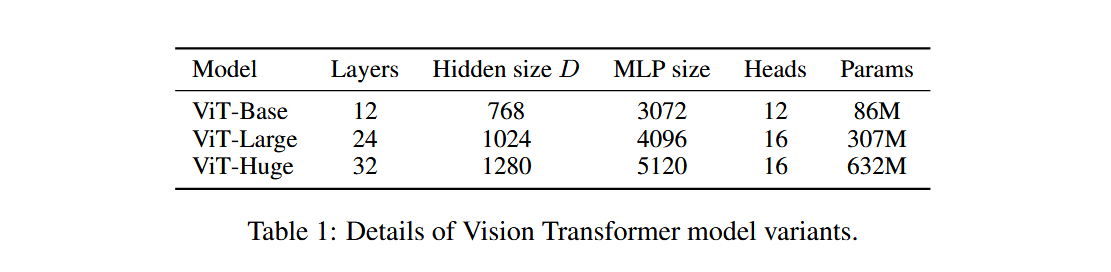